![alt text](Enunciado.png)

# Fluxograma 
![alt text](Fluxograma.png)


========== AUTOVALORES (ω²) ==========

>>> Homogênea:
5 menores autovalores:
[0.     0.001  0.0039 0.0089 0.0158]
5 maiores autovalores:
[3.9754 3.9842 3.9911 3.9961 3.999 ]

>>> Com defeito:
5 menores autovalores:
[0.     0.001  0.0039 0.0092 0.0158]
5 maiores autovalores:
[ 3.9839  3.9958  3.996   6.25   15.3759]


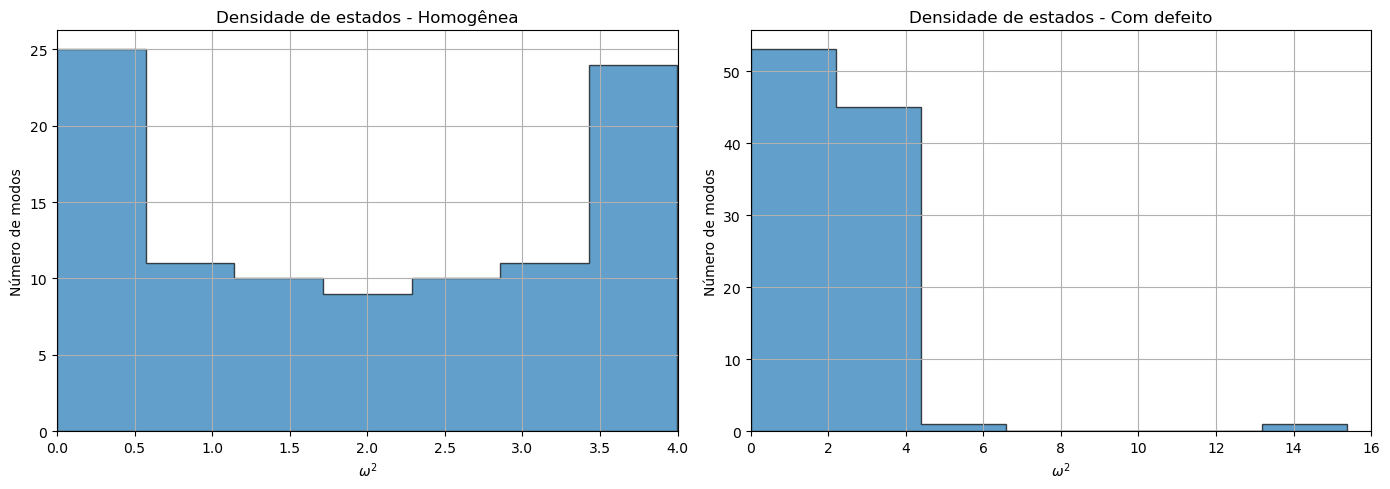

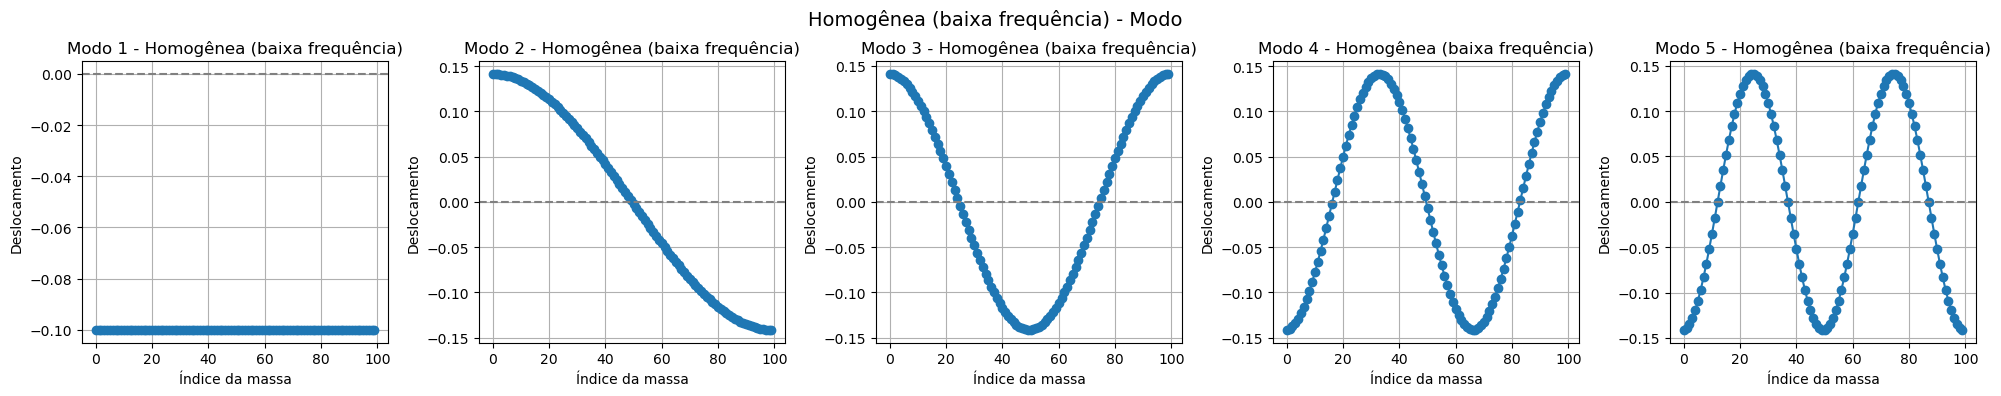

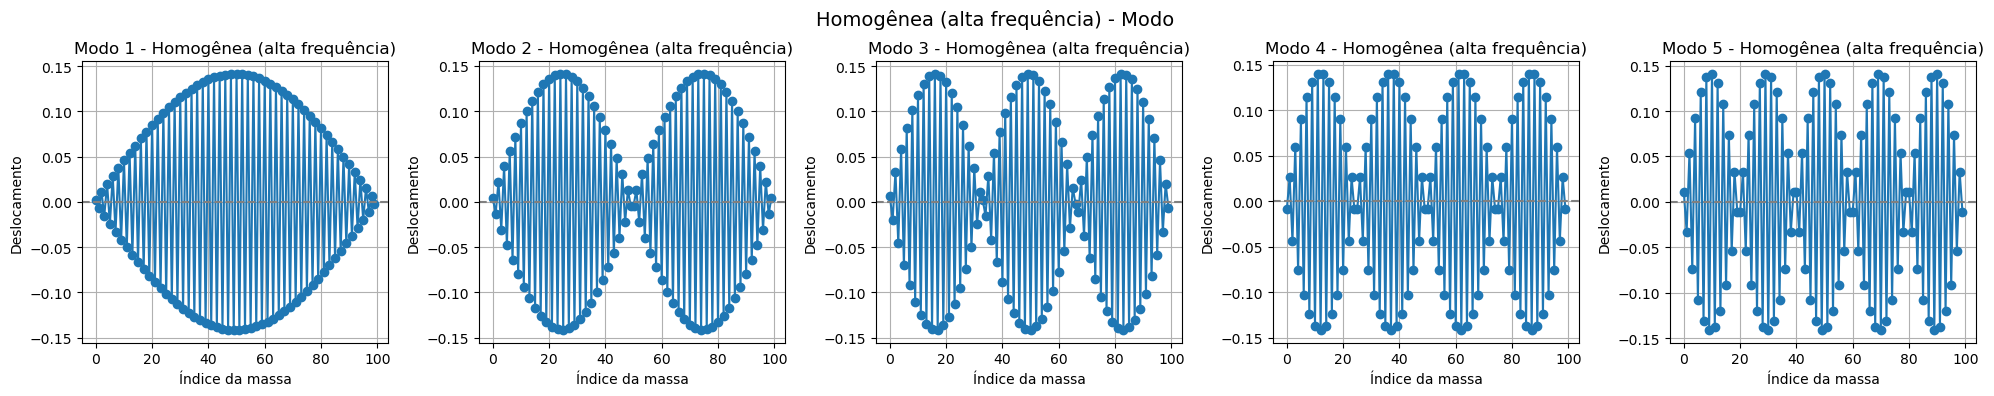

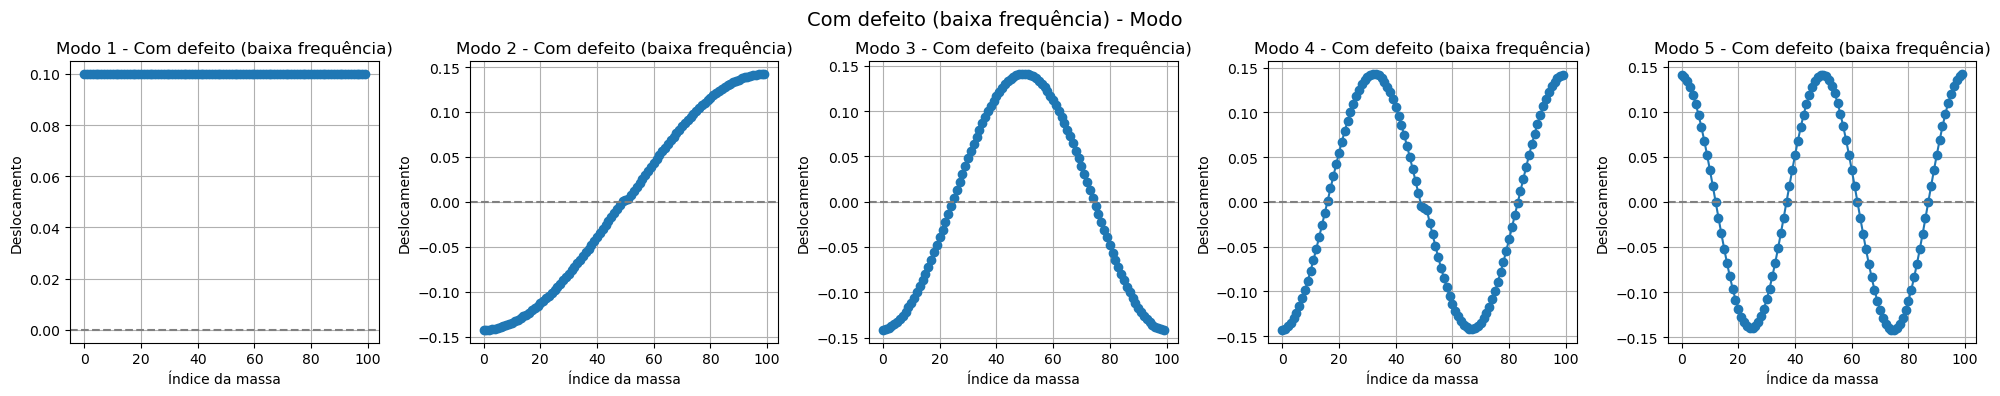

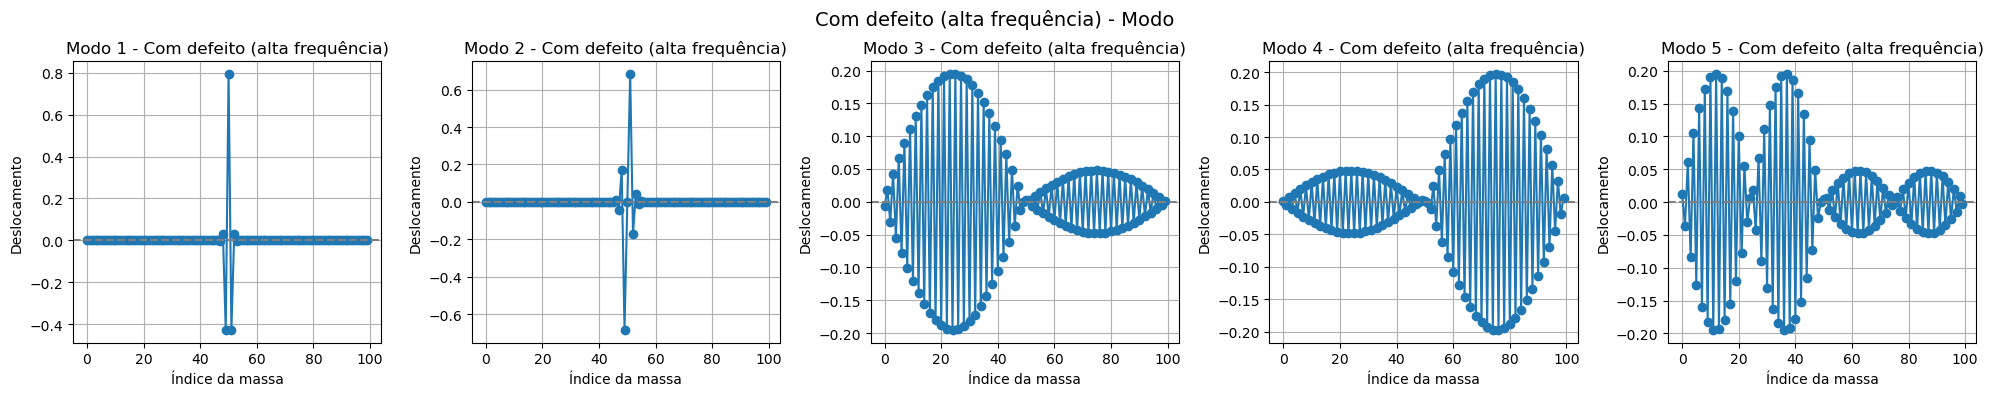

In [21]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Parâmetros
N = 100
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])


# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])


# ---------- IMPRESSÃO DOS 5 MENORES E MAIORES AUTOVALORES ----------

print("\n========== AUTOVALORES (ω²) ==========\n")

print(">>> Homogênea:")
print("5 menores autovalores:")
print(np.round(eigvals_h[idx_h][:5], 6))
print("5 maiores autovalores:")
print(np.round(eigvals_h[idx_h][-5:], 6))

print("\n>>> Com defeito:")
print("5 menores autovalores:")
print(np.round(eigvals_d[idx_d][:5], 6))
print("5 maiores autovalores:")
print(np.round(eigvals_d[idx_d][-5:], 6))



# ---------- HISTOGRAMAS LADO A LADO ----------
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(eigvals_h[idx_h], bins=7, histtype='stepfilled', edgecolor='k', alpha=0.7)
axs[0].set_title('Densidade de estados - Homogênea')
axs[0].set_xlabel(r'$\omega^2$')
axs[0].set_ylabel('Número de modos')
axs[0].set_xlim(0, 4)
axs[0].grid(True)

axs[1].hist(eigvals_d[idx_d], bins=7, histtype='stepfilled', edgecolor='k', alpha=0.7)
axs[1].set_title('Densidade de estados - Com defeito')
axs[1].set_xlabel(r'$\omega^2$')
axs[1].set_ylabel('Número de modos')
axs[1].set_xlim(0, 16)
axs[1].grid(True)

plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS - SUBPLOTS ORGANIZADOS ----------

def plot_modos_subplot(eigvecs, titulo_base, tipo, indices, N):
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    for i, idx in enumerate(indices):
        axs[i].plot(eigvecs[:, idx], marker='o')
        axs[i].axhline(0, color='gray', linestyle='--')
        axs[i].set_title(f'{titulo_base} {i+1} - {tipo}')
        axs[i].set_xlabel('Índice da massa')
        axs[i].set_ylabel('Deslocamento')
        axs[i].grid(True)
    fig.suptitle(f'{tipo} - {titulo_base}', fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show()

# Homogênea - menores frequências (índices 0 a 4)
plot_modos_subplot(eigvecs_h, 'Modo', 'Homogênea (baixa frequência)', range(5), N)

# Homogênea - maiores frequências (índices -1 a -5)
plot_modos_subplot(eigvecs_h, 'Modo', 'Homogênea (alta frequência)', range(N-1, N-6, -1), N)

# Defeito - menores frequências
plot_modos_subplot(eigvecs_d, 'Modo', 'Com defeito (baixa frequência)', range(5), N)

# Defeito - maiores frequências
plot_modos_subplot(eigvecs_d, 'Modo', 'Com defeito (alta frequência)', range(N-1, N-6, -1), N)




========== AUTOVALORES (ω²) ==========

>>> Homogênea:
5 menores autovalores:
[0.     0.     0.     0.0001 0.0002]
5 maiores autovalores:
[3.9998 3.9998 3.9999 4.     4.    ]

>>> Com defeito:
5 menores autovalores:
[0.     0.     0.     0.0001 0.0002]
5 maiores autovalores:
[ 3.9998  4.      4.      6.25   15.3759]


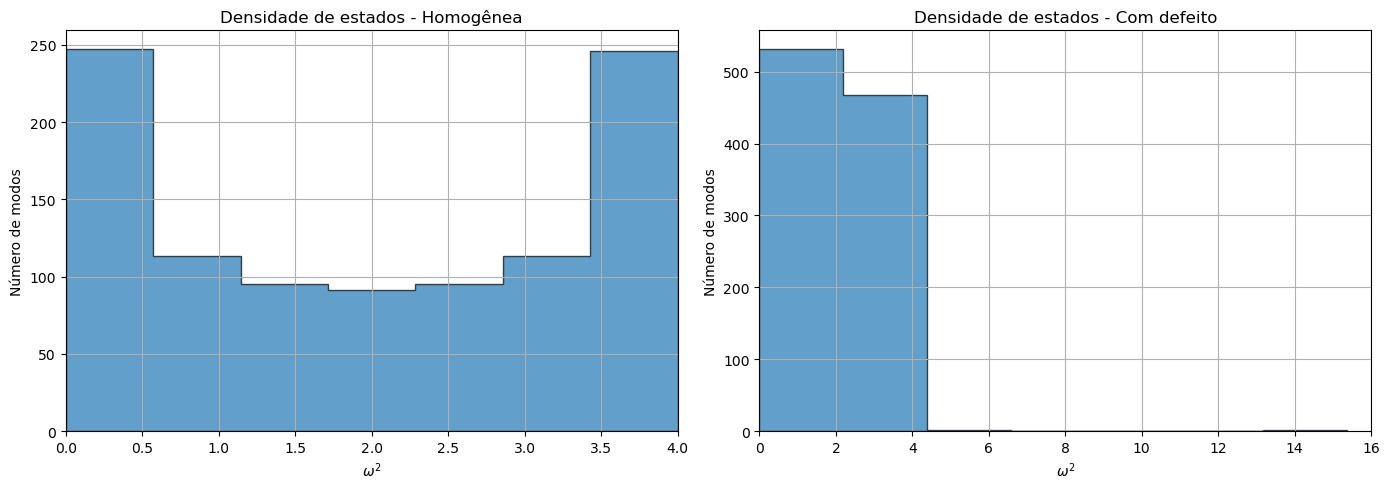

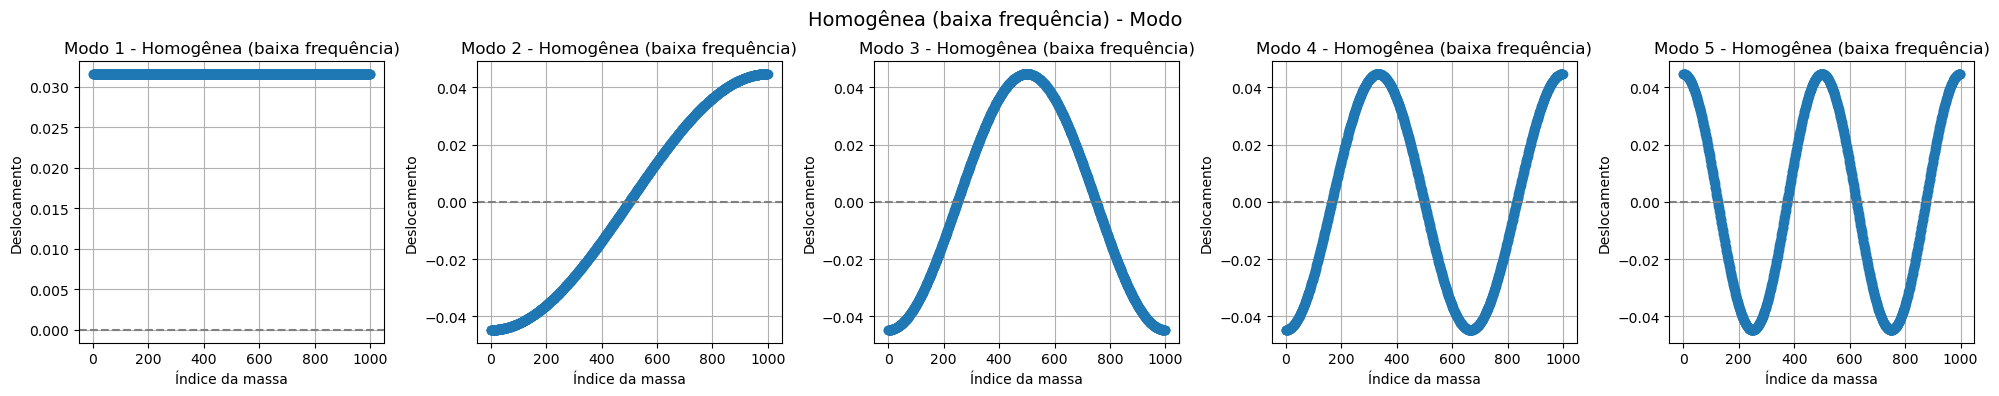

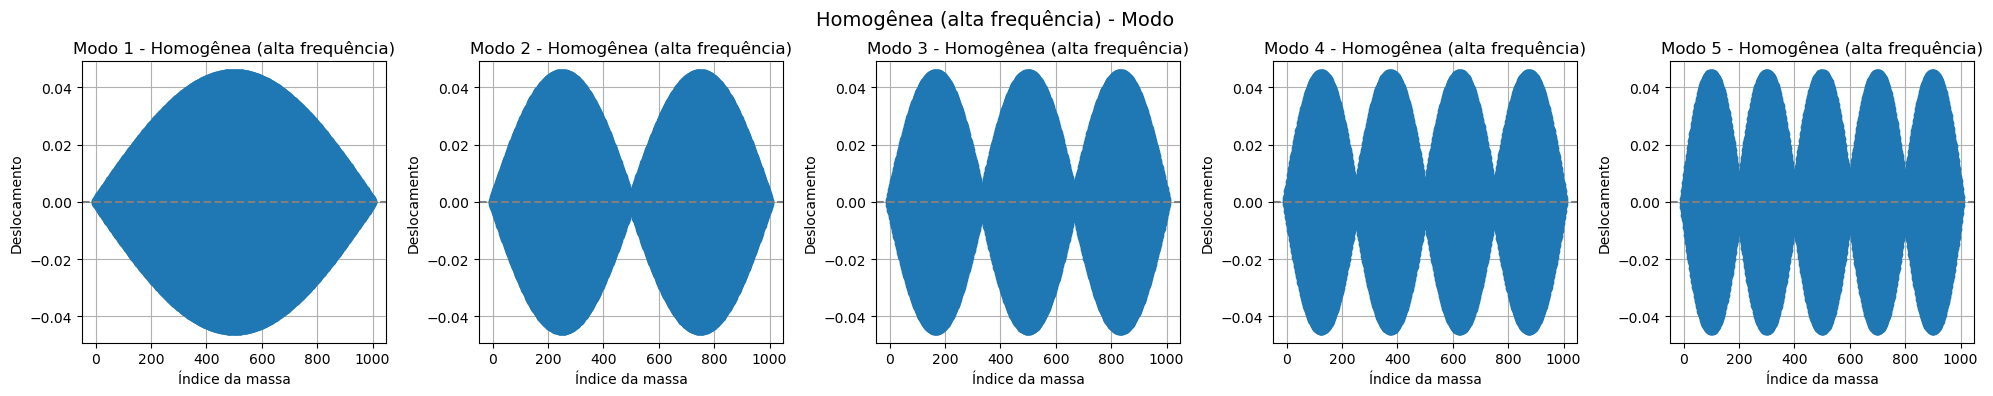

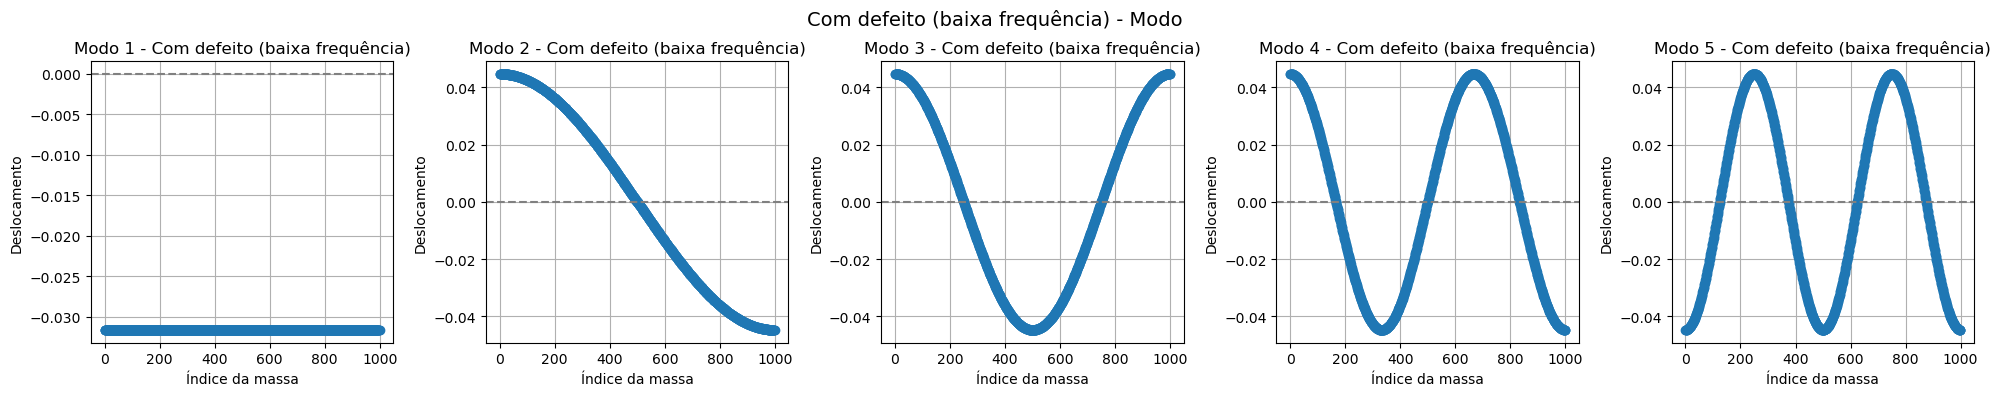

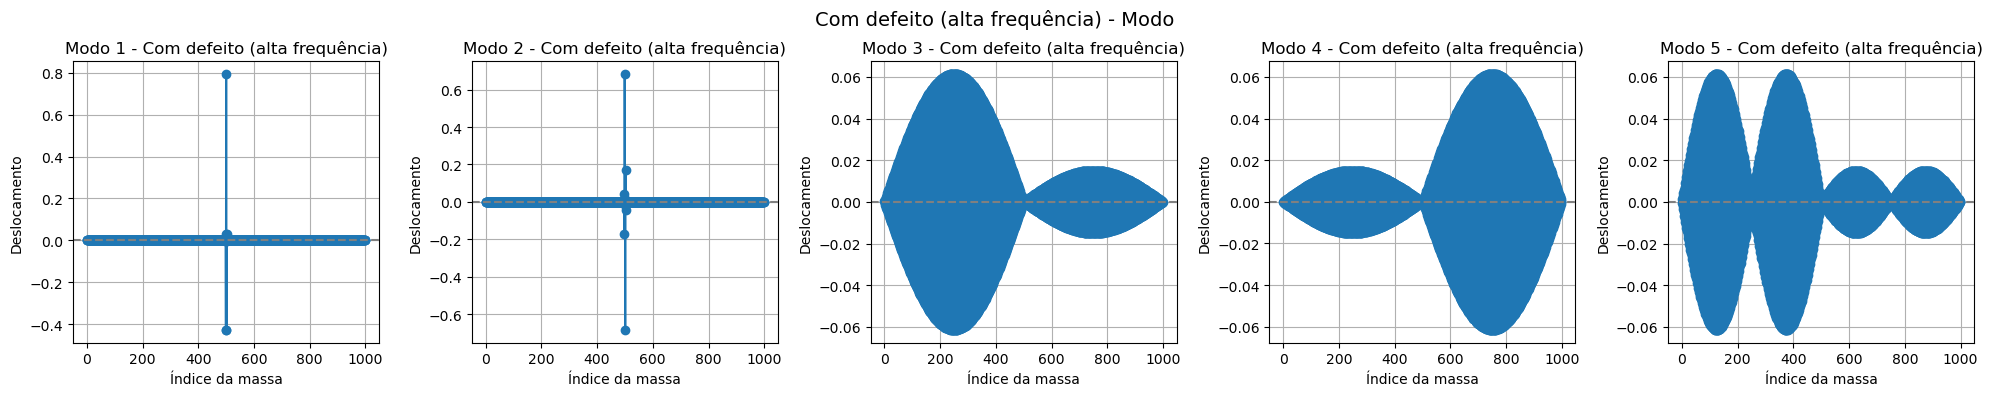

In [22]:
# Parâmetros
N = 1000
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])


# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])


# ---------- IMPRESSÃO DOS 5 MENORES E MAIORES AUTOVALORES ----------

print("\n========== AUTOVALORES (ω²) ==========\n")

print(">>> Homogênea:")
print("5 menores autovalores:")
print(np.round(eigvals_h[idx_h][:5], 6))
print("5 maiores autovalores:")
print(np.round(eigvals_h[idx_h][-5:], 6))

print("\n>>> Com defeito:")
print("5 menores autovalores:")
print(np.round(eigvals_d[idx_d][:5], 6))
print("5 maiores autovalores:")
print(np.round(eigvals_d[idx_d][-5:], 6))



# ---------- HISTOGRAMAS LADO A LADO ----------
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(eigvals_h[idx_h], bins=7, histtype='stepfilled', edgecolor='k', alpha=0.7)
axs[0].set_title('Densidade de estados - Homogênea')
axs[0].set_xlabel(r'$\omega^2$')
axs[0].set_ylabel('Número de modos')
axs[0].set_xlim(0, 4)
axs[0].grid(True)

axs[1].hist(eigvals_d[idx_d], bins=7, histtype='stepfilled', edgecolor='k', alpha=0.7)
axs[1].set_title('Densidade de estados - Com defeito')
axs[1].set_xlabel(r'$\omega^2$')
axs[1].set_ylabel('Número de modos')
axs[1].set_xlim(0, 16)
axs[1].grid(True)

plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS - SUBPLOTS ORGANIZADOS ----------

def plot_modos_subplot(eigvecs, titulo_base, tipo, indices, N):
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    for i, idx in enumerate(indices):
        axs[i].plot(eigvecs[:, idx], marker='o')
        axs[i].axhline(0, color='gray', linestyle='--')
        axs[i].set_title(f'{titulo_base} {i+1} - {tipo}')
        axs[i].set_xlabel('Índice da massa')
        axs[i].set_ylabel('Deslocamento')
        axs[i].grid(True)
    fig.suptitle(f'{tipo} - {titulo_base}', fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show()

# Homogênea - menores frequências (índices 0 a 4)
plot_modos_subplot(eigvecs_h, 'Modo', 'Homogênea (baixa frequência)', range(5), N)

# Homogênea - maiores frequências (índices -1 a -5)
plot_modos_subplot(eigvecs_h, 'Modo', 'Homogênea (alta frequência)', range(N-1, N-6, -1), N)

# Defeito - menores frequências
plot_modos_subplot(eigvecs_d, 'Modo', 'Com defeito (baixa frequência)', range(5), N)

# Defeito - maiores frequências
plot_modos_subplot(eigvecs_d, 'Modo', 'Com defeito (alta frequência)', range(N-1, N-6, -1), N)



In [ ]:
# Parâmetros
N = 10000
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])


# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])


# ---------- IMPRESSÃO DOS 5 MENORES E MAIORES AUTOVALORES ----------

print("\n========== AUTOVALORES (ω²) ==========\n")

print(">>> Homogênea:")
print("5 menores autovalores:")
print(np.round(eigvals_h[idx_h][:5], 6))
print("5 maiores autovalores:")
print(np.round(eigvals_h[idx_h][-5:], 6))

print("\n>>> Com defeito:")
print("5 menores autovalores:")
print(np.round(eigvals_d[idx_d][:5], 6))
print("5 maiores autovalores:")
print(np.round(eigvals_d[idx_d][-5:], 6))



# ---------- HISTOGRAMAS LADO A LADO ----------
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(eigvals_h[idx_h], bins=7, histtype='stepfilled', edgecolor='k', alpha=0.7)
axs[0].set_title('Densidade de estados - Homogênea')
axs[0].set_xlabel(r'$\omega^2$')
axs[0].set_ylabel('Número de modos')
axs[0].set_xlim(0, 4)
axs[0].grid(True)

axs[1].hist(eigvals_d[idx_d], bins=7, histtype='stepfilled', edgecolor='k', alpha=0.7)
axs[1].set_title('Densidade de estados - Com defeito')
axs[1].set_xlabel(r'$\omega^2$')
axs[1].set_ylabel('Número de modos')
axs[1].set_xlim(0, 16)
axs[1].grid(True)

plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS - SUBPLOTS ORGANIZADOS ----------

def plot_modos_subplot(eigvecs, titulo_base, tipo, indices, N):
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    for i, idx in enumerate(indices):
        axs[i].plot(eigvecs[:, idx], marker='o')
        axs[i].axhline(0, color='gray', linestyle='--')
        axs[i].set_title(f'{titulo_base} {i+1} - {tipo}')
        axs[i].set_xlabel('Índice da massa')
        axs[i].set_ylabel('Deslocamento')
        axs[i].grid(True)
    fig.suptitle(f'{tipo} - {titulo_base}', fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show()

# Homogênea - menores frequências (índices 0 a 4)
plot_modos_subplot(eigvecs_h, 'Modo', 'Homogênea (baixa frequência)', range(5), N)

# Homogênea - maiores frequências (índices -1 a -5)
plot_modos_subplot(eigvecs_h, 'Modo', 'Homogênea (alta frequência)', range(N-1, N-6, -1), N)

# Defeito - menores frequências
plot_modos_subplot(eigvecs_d, 'Modo', 'Com defeito (baixa frequência)', range(5), N)

# Defeito - maiores frequências
plot_modos_subplot(eigvecs_d, 'Modo', 'Com defeito (alta frequência)', range(N-1, N-6, -1), N)

